EJ020102

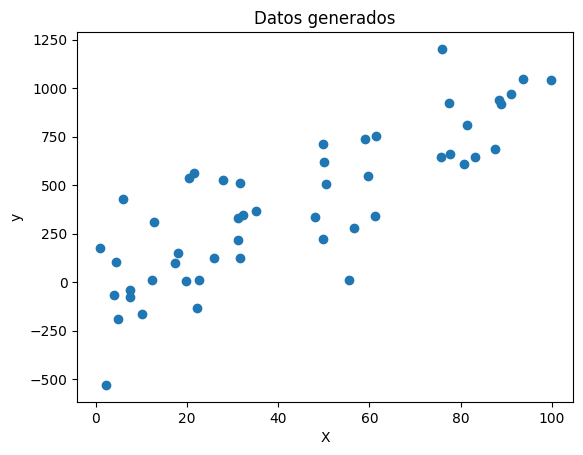

Pendiente: 
 [[10.26949471]]
Término independiente: 
 [-72.88435852]
La recta de regresión es: y = -72.884359 + 10.269495 * X
Cálculo del error o pérdida del modelo de regresión lineal
ECM : 53501.76
Coeficiente Correlacción: 0.63


<ipython-input-1-c26fd959477e>:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('La recta de regresión es: y = %f + %f * X' % (t0, t1))


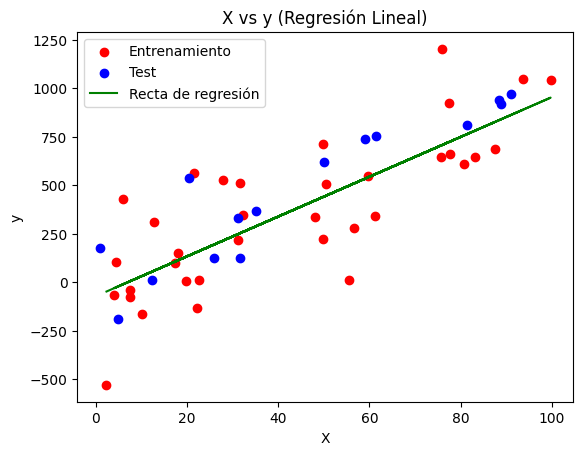

Cálculo del error o pérdida del modelo de regresión lineal con datos de test
ECM : 28242.96
Coeficiente Correlacción: 0.79
La predicción de y para un valor X de 50 es:  [[440.59037681]]


In [1]:
# Importar las librerías necesarias
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Definir las funciones
# Generador de distribución de datos para regresión lineal simple
def generador_datos_simple(beta, muestras, desviacion):
    # Genera n (muestras) de valores de x aleatorios entre 0 y 100
    X = np.random.random(muestras) * 100
    # Genera un error aleatorio gaussiano con desviación típica (desviacion)
    e = np.random.randn(muestras) * desviacion
    # Obtener la etiqueta (y) real como x*beta + error
    y = X * beta + e
    return X.reshape((muestras,1)), y.reshape((muestras,1))

# Parámetros de la distribución
desviacion = 200
beta = 10
n = 50
X, y = generador_datos_simple(beta, n, desviacion)

# Representar los datos generados
plt.scatter(X, y)
plt.title("Datos generados")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Dividir el conjunto de datos para entrenamiento y test
n_train = int(n * 0.7)

X_train = np.array(X[:n_train])
y_train = np.array(y[:n_train])

X_test = np.array(X[n_train:])
y_test = np.array(y[n_train:])

# Crear el objeto de Regresión Lineal
regr = linear_model.LinearRegression()

# Entrenar el modelo
regr.fit(X_train, y_train)

# Realizar predicciones sobre los atributos de entrenamiento
y_pred = regr.predict(X_train)

# Obtener los parámetros del modelo de regresión
# Pendiente de la recta
t1 = regr.coef_
print('Pendiente: \n', t1)
# Corte con el eje Y (en X=0)
t0 = regr.intercept_
print('Término independiente: \n', t0)

# Ecuación de la recta
print('La recta de regresión es: y = %f + %f * X' % (t0, t1))

# Calcular el error del ajuste del modelo de regresión
print("Cálculo del error o pérdida del modelo de regresión lineal")
print("ECM : %.2f" % mean_squared_error(y_train, y_pred))
print('Coeficiente Correlacción: %.2f' % r2_score(y_train, y_pred))

# Dibujar la recta de regresión y los puntos de entrenamiento y test
plt.scatter(X_train, y_train, color='red', label="Entrenamiento")
plt.scatter(X_test, y_test, color='blue', label="Test")
plt.plot(X_train, y_pred, color='green', label="Recta de regresión")
plt.title("X vs y (Regresión Lineal)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Comprobar con los valores de test si el ajuste es bueno o no
y_pred_test = regr.predict(X_test)
print("Cálculo del error o pérdida del modelo de regresión lineal con datos de test")
print("ECM : %.2f" % mean_squared_error(y_test, y_pred_test))
print('Coeficiente Correlacción: %.2f' % r2_score(y_test, y_pred_test))

# Predecir la etiqueta ‘y’ para un valor X=50
y_pred2 = regr.predict(np.array([[50]]))
print('La predicción de y para un valor X de 50 es: ', y_pred2)